In [3]:
import pandas as pd

In [6]:
df = pd.read_csv('data/Reviews.csv') 

FileNotFoundError: [Errno 2] No such file or directory: 'data/Reviews.csv'

View Data

In [28]:
df.head()  

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [29]:
df.sample(3) 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
16668,16669,B001LGGH40,A2F2S1L61X1LA9,"Bromptonboy ""Bromptonboy""",0,0,3,1238457600,Expensive Tasty Indulgence,"The flavor combination of kiwi, and strawberry..."
462055,462056,B0046HLMUA,AYCQ6QPK8ADET,C. Pipher III,1,1,4,1349827200,Good base to build from,I have had and ordered this product many times...
526855,526856,B005QRPGQU,A2E7RX6AFUDQEX,Elizabeth Finlay,0,0,4,1324425600,Great treat,"*I let my sister try them with her dog, 'cause..."



Inspect Structure

In [30]:
df.shape              # Rows and columns
df.columns            # Column names
df.info()             # Data types and nulls
df.describe()         # Summary stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Handling Missing Data

In [31]:

df.isnull().sum()                     # Count nulls
df.dropna(inplace=True)              # Drop rows with any nulls


Removing Duplicates

In [32]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Remove exact duplicates (same review and rating)

In [33]:
df = df.drop_duplicates(subset=['Summary', 'Score'])

Remove conflicting reviews (same text but different ratings)

In [34]:
# Find conflicting reviews
conflicts = df.groupby('Summary')['Score'].nunique()
conflicting_texts = conflicts[conflicts > 1].index

# Remove them
df = df[~df['Summary'].isin(conflicting_texts)]

print("After removing conflicting reviews:", df.shape)


After removing conflicting reviews: (287242, 10)


In [35]:
df.to_csv('data/cleaned_data.csv', index=False)

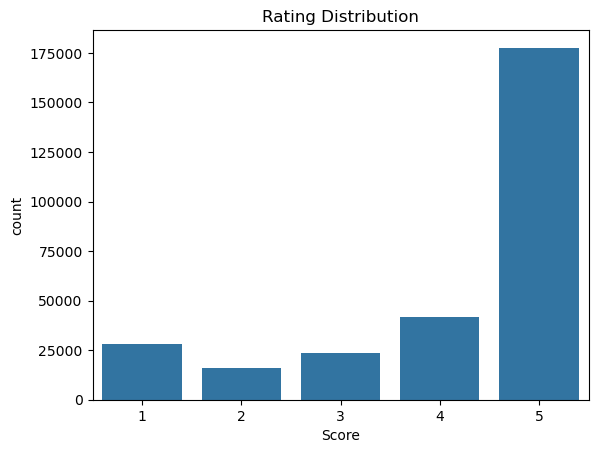

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Score", data=df)
plt.title("Rating Distribution")
plt.show()


Creating a Balanced Dataset for initial training and prototyping

In [37]:
df["Score"].value_counts()

Score
5    177585
4     41893
1     27918
3     23819
2     16027
Name: count, dtype: int64

In [38]:
df.shape
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [39]:
df = df.drop(columns=["Id", "ProductId", "UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary"])

In [40]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [41]:
import pandas as pd

# 1. Decide on a total dataset size (e.g., 5000 rows)
total_size = 10000 

# 2. Define your desired distribution percentages
dist = {
    1: 0.10,  # 10%
    2: 0.15,  # 15%
    3: 0.25,  # 25%
    4: 0.30,  # 30%
    5: 0.20   # 20%
}

# 3. Sample from each group based on the percentages
frames = []
for score, percent in dist.items():
    n_samples = int(total_size * percent)
    # Filter for the specific score and sample the required amount
    sample = df[df['Score'] == score].sample(n=n_samples, random_state=42)
    frames.append(sample)

# 4. Combine them into your new imbalanced dataset
df_custom_imbalanced = pd.concat(frames).sample(frac=1).reset_index(drop=True)

# 5. Verify the results
print("Custom Imbalanced Distribution:")
print(df_custom_imbalanced['Score'].value_counts(normalize=True) * 100)

Custom Imbalanced Distribution:
Score
4    30.0
3    25.0
5    20.0
2    15.0
1    10.0
Name: proportion, dtype: float64


In [42]:
# Save the balanced/imbalanced dataset to a new CSV file
df_custom_imbalanced.to_csv('Unbalanced_reviews.csv', index=False)

print("File saved successfully as 'Inbalanced_reviews.csv'!")

File saved successfully as 'Inbalanced_reviews.csv'!


In [43]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [44]:
df = pd.read_csv('Unbalanced_reviews.csv') 

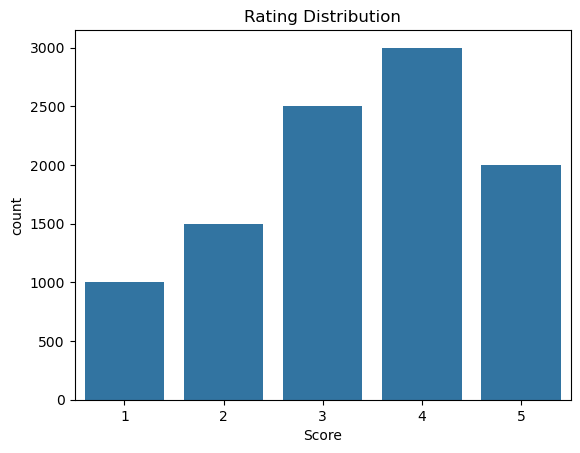

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Score", data=df)
plt.title("Rating Distribution")
plt.show()
